In [1]:
folder_path_str = '/home/jiongyi/Documents/bead_motility/2019_10_03/exp_01/470_egfp_wave_pwca_550_a568_actin_640_a647_actin_33'
file_name_str = '470_egfp_wave_pwca_550_a568_actin_640_a647_actin_33_MMStack.ome.tif'

In [2]:
from skimage.io import imread
from skimage import img_as_float
mm_stack = imread(folder_path_str + '/' + file_name_str)

In [3]:
npf_im = img_as_float(mm_stack[:, :, 0])
pulse_im = img_as_float(mm_stack[:, :, 1])
chase_im = img_as_float(mm_stack[:, :, 2])

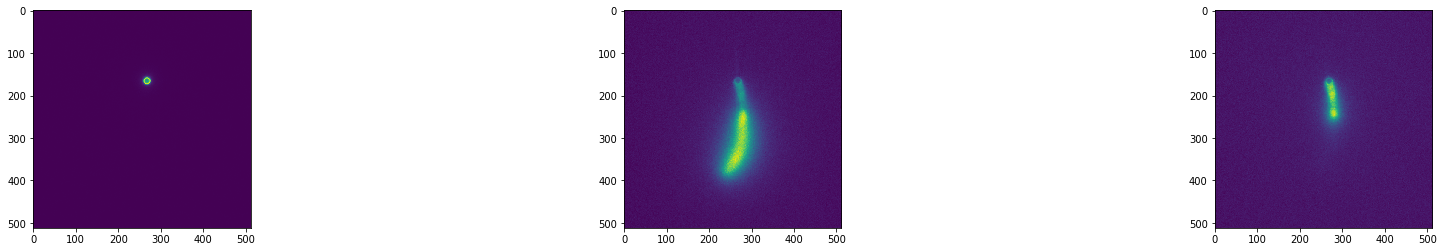

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots
fig1_hand, axes1_hand = subplots(ncols = 3, nrows = 1)
fig1_hand.set_figwidth(30)
axes1_hand[0].imshow(npf_im)
axes1_hand[1].imshow(pulse_im)
axes1_hand[2].imshow(chase_im)

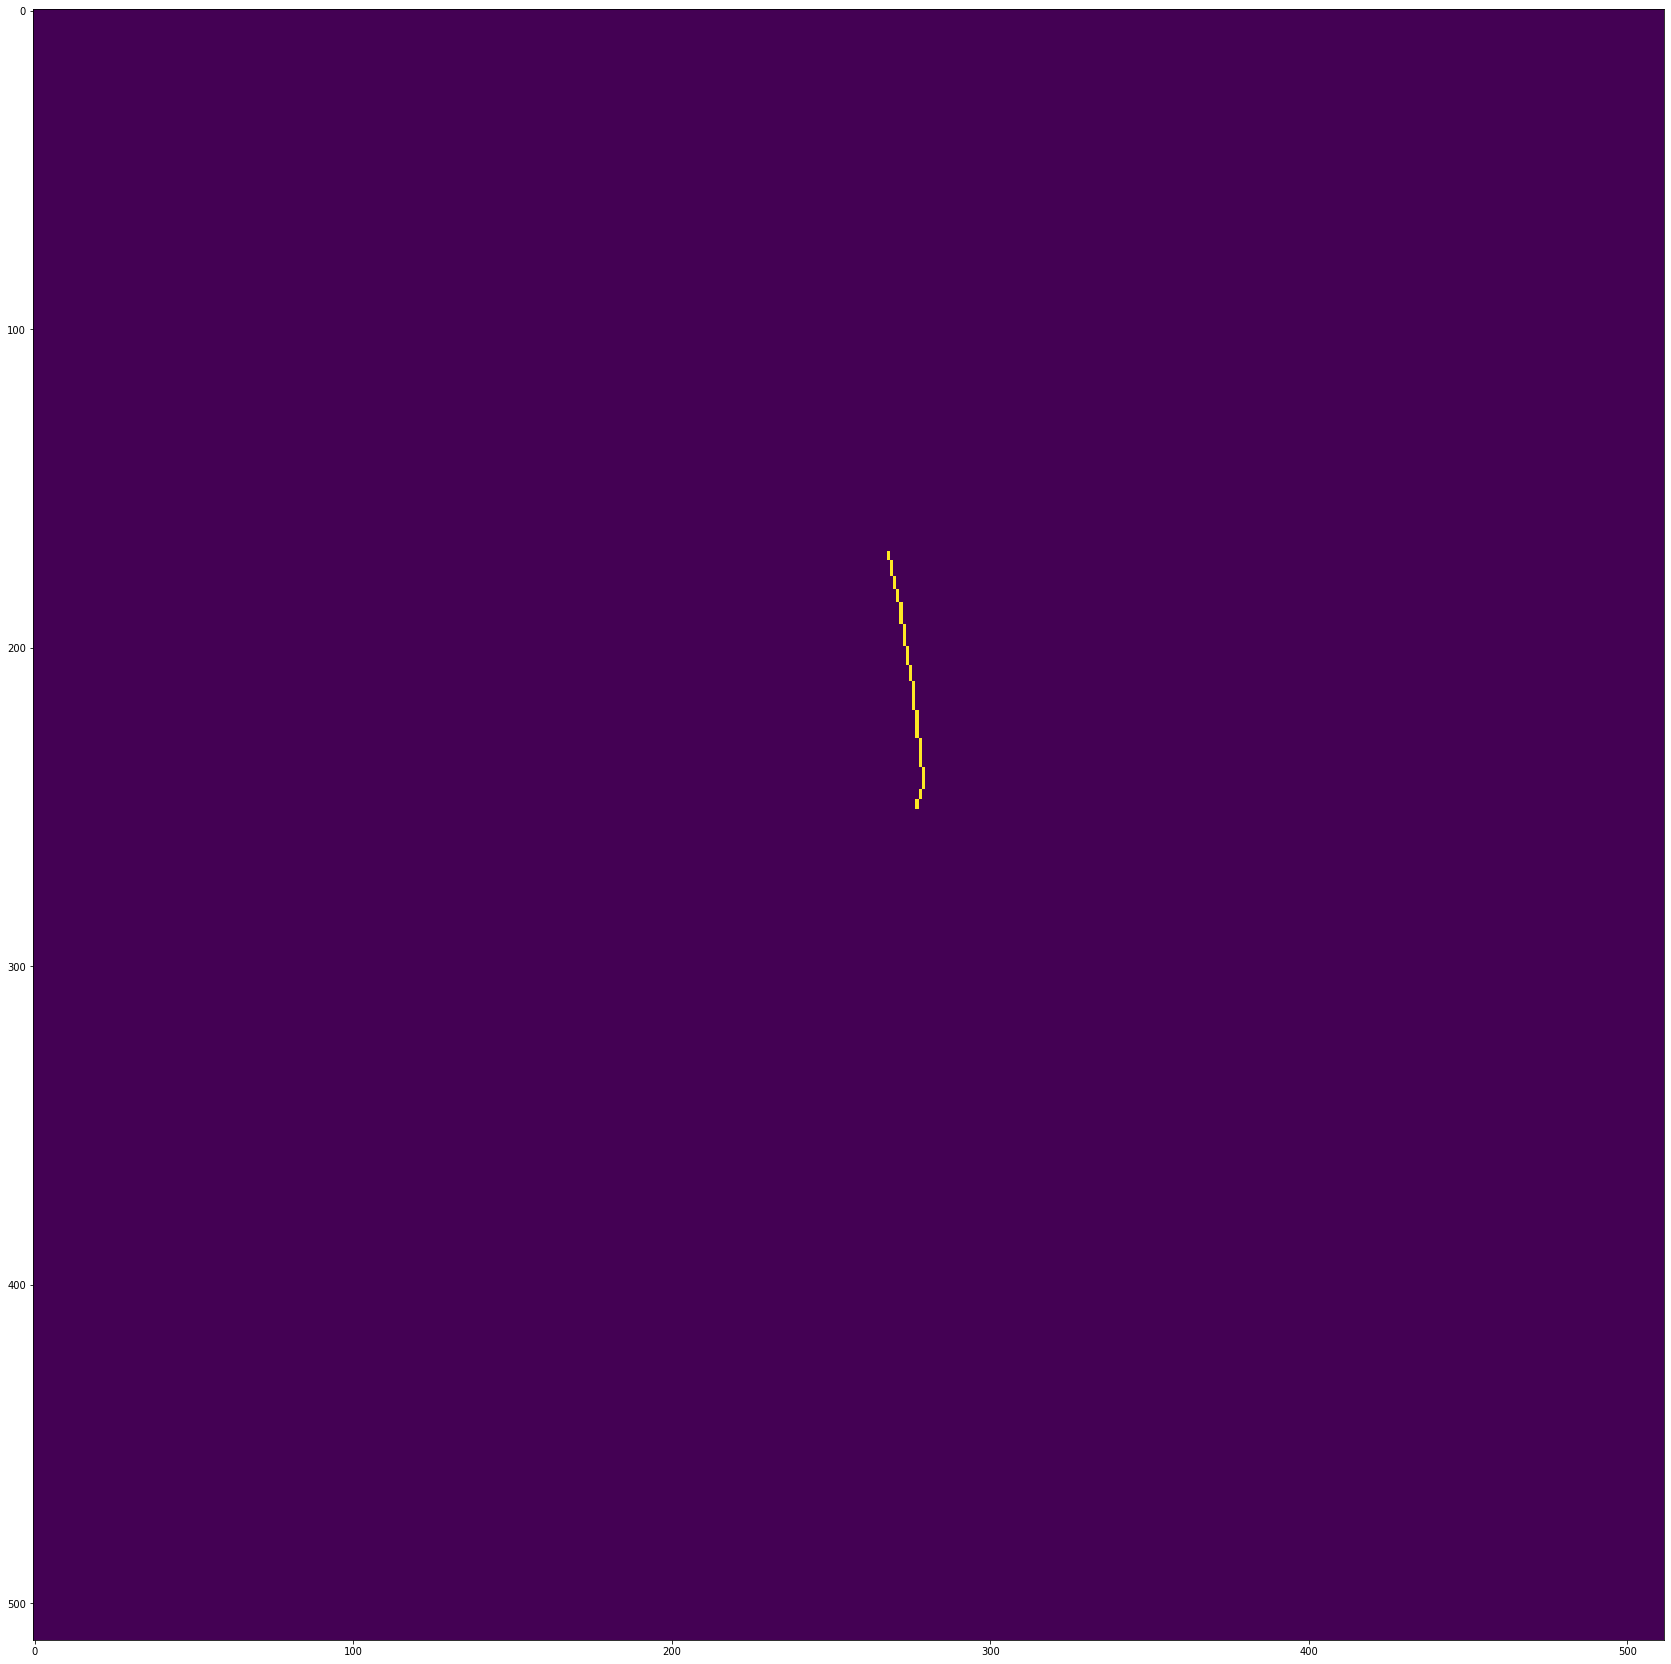

In [9]:
from skimage.filters import gaussian, threshold_otsu, sobel
from skimage.morphology import convex_hull_image, medial_axis
pulse_gaussian_im = gaussian(pulse_im, sigma = 0.2)
chase_gaussian_im = gaussian(chase_im, sigma = 0.2)
chase_bw_im = chase_gaussian_im > threshold_otsu(chase_gaussian_im)
chase_hull_bw_im = convex_hull_image(chase_bw_im)
fig2_hand, axes2_hand = subplots()
fig2_hand.set_figheight(30)
fig2_hand.set_figwidth(30)
axes2_hand.imshow(medial_axis(chase_hull_bw_im))